In [31]:
import pandas as pd
import numpy as np
from fooof import FOOOF 
from fooof import FOOOFGroup
import os
wd = os.getcwd()
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [32]:
os.getcwd()

'C:\\Users\\u0930009\\Downloads'

In [16]:
# Initialize a FOOOF object
fm = FOOOF(peak_width_limits=[1.0, 8.0], max_n_peaks=8, min_peak_height=0.05,
           peak_threshold=2.0, aperiodic_mode='fixed')

In [17]:
def flatten_psd(tested_freqs, elec_psd, freq_range = [2, 25]):
    """Flatten the power spectral density using the FOOOF algorithm.

    Args:
        tested_freqs: An array containing the frequencies of interest.
        elec_psd: An array containing the original electrode power spectral density.

    Returns:
        results: A dictionary containing the flat spectrum, offset, slope, peak parameters, guassian parameters,
         FOOOFED spectra, R2 and the error.
    """
    e = FOOOF(peak_width_limits=[1.0, 8.0], max_n_peaks=8, min_peak_height=0.05,
           peak_threshold=2.0, aperiodic_mode='fixed')
    # Add data to FOOOF object
    e.add_data(tested_freqs, elec_psd, freq_range)
    e.fit(tested_freqs, elec_psd, freq_range)

    results = dict()
    results['tested_Frequencies'] = tested_freqs
    results['flat_Spectrum'] = e._peak_fit
    results['Offset'] = e.aperiodic_params_[0]
    results['Slope'] = e.aperiodic_params_[1] # Exponent
    results['PeakParams'] = e.peak_params_
    results['GaussianParams'] = e.gaussian_params_
    results['Foofed'] = e.fooofed_spectrum_
    results['R2'] = e.r_squared_
    results['OError'] = e.error_

    return results

In [18]:
data = pd.read_csv('MASTER_FOOOF.csv')
data.head()

,subID,group,condition,band,Hz,Fp1,Fz,F3,F7,FT9,...,T8,FT10,FC6,FC2,F4,F8,Fp2,Frontal,Central,Parietal
0,oa01,oa,ec,Delta,0.997,24.6043,11.8329,16.5189,18.8309,NaN,...,12.6891,16.0658,10.6030,11.6458,19.1478,29.3230,14.9305,19.13070,24.849333,16.43702
1,oa01,oa,ec,Delta,1.994,3.0283,3.7846,4.0779,3.2395,NaN,...,2.1820,2.5705,2.2605,4.4698,4.5669,3.0399,1.8419,3.74176,4.926267,4.48886
2,oa01,oa,ec,Delta,2.991,1.1895,2.2697,2.2105,1.4187,NaN,...,0.8036,0.9160,1.2260,2.5144,2.1215,1.1281,0.7567,1.82970,2.577300,2.56510
3,oa01,oa,ec,Delta,3.988,0.8209,1.5906,1.5326,0.9582,NaN,...,0.5038,0.5460,0.8618,1.7507,1.4073,0.7265,0.5294,1.24304,1.697467,1.57850
4,oa01,oa,ec,Theta,4.985,0.5749,1.0981,1.1093,0.6680,NaN,...,0.2585,0.2692,0.5525,1.1130,0.9249,0.4673,0.3382,0.85352,1.100933,0.91234


Run the FOOOF Model¶

In [19]:
# Filter data for one subject 
subset_subject = data[data['subID']=='ya22']
subset = subset_subject[subset_subject['condition']=='ec']


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 26 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

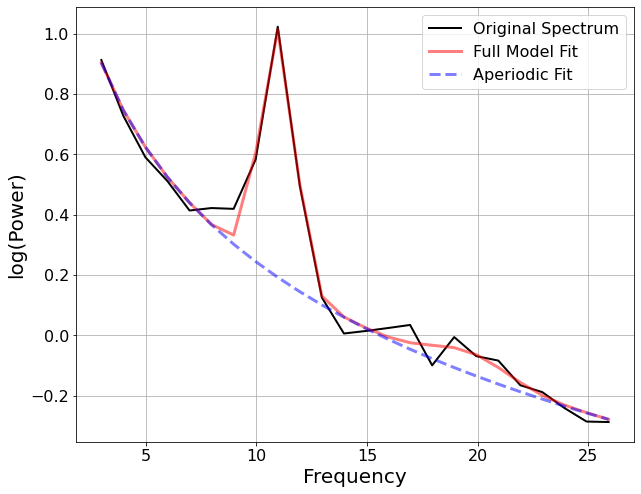

In [20]:
e = FOOOF()
freq_range = [2, 26]
tested_freqs = np.array(subset['Hz'])
elec_psd = np.array(subset['Frontal']) # Frontal

e.report(tested_freqs, elec_psd, freq_range)